In [30]:
import numpy as np
import matplotlib.pyplot as plt

import numdifftools as nd
from scipy.interpolate import interp1d

In [2]:
import modules.plots.real_ir as ir_plots

from modules_reloader import reloader
relmod = reloader(ir_plots)

In [3]:
ir_shape = np.loadtxt('../experimental-data/pmt-characteristics/ir-shape.txt')
ir_t = np.arange(0, ir_shape.size, dtype=float)  # ns, ir shape is sampled at 1 ns
ir_t /= 12.5  # ns -> bin

ir_integral = np.sum(ir_shape) * (ir_t[1] - ir_t[0])
ir_shape /= ir_integral

In [51]:
Cpmt_invcdf = np.loadtxt('../experimental-data/pmt-characteristics/ir-amplification-invcdf.dat')

Cpmt_values = Cpmt_invcdf[:, 1] / 1.7031  # normalizing it to mean = 1
Cpmt_cdf = Cpmt_invcdf[:, 0]

Cpmt_cdf_func = interp1d(Cpmt_values, Cpmt_cdf, kind='cubic', bounds_error=False, fill_value=(0, 1))
Cpmt_pdf_func = nd.Derivative(Cpmt_cdf_func)

Cpmt_pdf = Cpmt_pdf_func(Cpmt_values)

In [68]:
relmod()

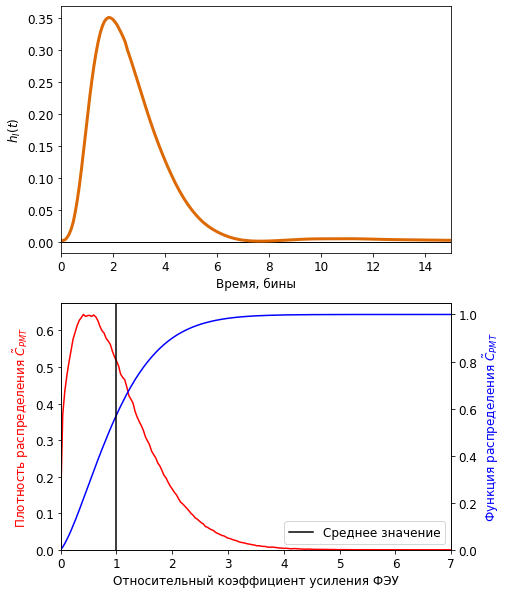

In [70]:
filename = 'experimantal-ir-params'
f, a = ir_plots.plot_real_ir_shape_and_distribution(ir_t, ir_shape, Cpmt_values, Cpmt_pdf, Cpmt_cdf, filename=filename)